# 컨볼루션 신경망(Convolution Neural Network, CNN)

## 주요 레이어

### Conv2D

- `tensorflow.keras.layers.Conv2D`

- `tf.nn.conv2d`

In [96]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np
from sklearn.datasets import load_sample_image

In [97]:
china = load_sample_image('china.jpg') / 255
print(china.dtype)
print(china.shape)

float64
(427, 640, 3)


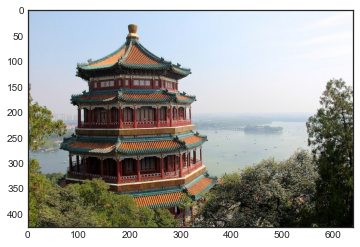

In [98]:
plt.imshow(china)
plt.show()

In [99]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


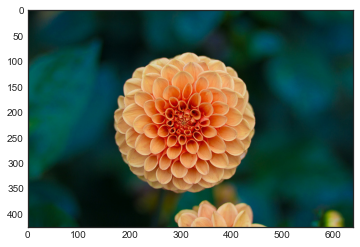

In [100]:
plt.imshow(flower)
plt.show()

In [101]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(images.shape)

(2, 427, 640, 3)


In [102]:
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

print(filters.shape)

(7, 7, 3, 2)


(2, 427, 640, 2)


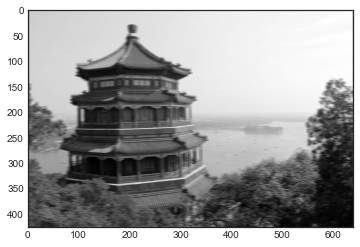

In [103]:
# Use to TF

outputs = tf.nn.conv2d(images, filters = filters, strides = 1, padding = 'SAME')
print(outputs.shape)
plt.imshow(outputs[0, :, :, 1], cmap = 'gray')
plt.show()

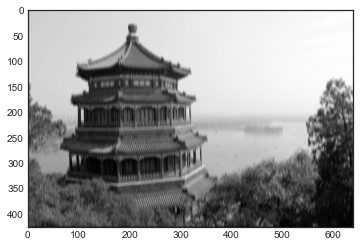

In [104]:
plt.imshow(outputs[0, :, :, 0], cmap = 'gray')
plt.show()

In [105]:
# Use to Keras

conv = Conv2D(filters = 32, kernel_size = 3, strides = 1,
             padding = 'same', activation = 'relu')

### MaxPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.max_pool`
  - 사용자가 사이즈를 맞춰줘야함
  - 케라스의 모델의 층으로 사용하고 싶으면 Lambda층으로 감싸줘야함

- 케라스 고수준 API
  - `keras.layers.MaxPool2D`


In [106]:
from tensorflow.keras.layers import MaxPool2D, Lambda

In [109]:
with tf.device("/cpu:0"):
    output = tf.nn.max_pool(images, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = 'VALID')

In [110]:
# Keras
output_keras = Lambda(lambda X: tf.nn.max_pool(X, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = 'VALID'))

In [111]:
max_pool = MaxPool2D(pool_size = 2)

In [112]:
flower = load_sample_image('flower.jpg') / 255
print(flower.dtype)
print(flower.shape)

float64
(427, 640, 3)


In [113]:
flower = np.expand_dims(flower, axis = 0)
flower.shape

(1, 427, 640, 3)

In [114]:
## Conv -> Max Pooling
output = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(flower)
output = MaxPool2D(pool_size = 2)(output)

output.shape

### (1, 427, 640, 3) -->> (1, 213, 320, 32)

TensorShape([1, 213, 320, 32])

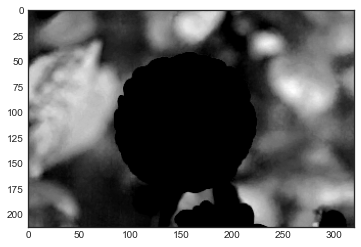

In [115]:
plt.imshow(output[0, :, :, 4], cmap = 'gray')
plt.show()

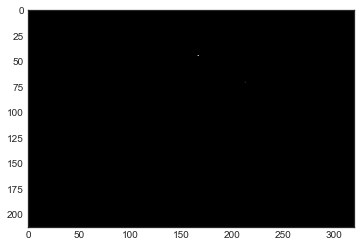

In [120]:
plt.imshow(output[0, :, :, 8], cmap = 'gray')
plt.show()

### AvgPool2D

- 텐서플로 저수준 딥러닝 API
  - `tf.nn.avg_pool`

- 케라스 고수준 API
  - `keras.layers.AvgPool2D`

In [121]:
from tensorflow.keras.layers import AvgPool2D

In [122]:
flower.shape

(1, 427, 640, 3)

In [123]:
output = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(flower)
output = AvgPool2D(pool_size = 2)(output)

output.shape

TensorShape([1, 213, 320, 32])

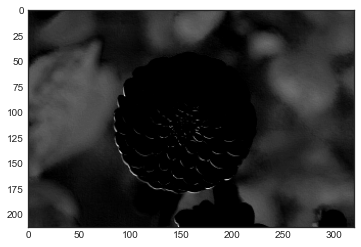

In [124]:
plt.imshow(output[0, :, :, 2], cmap = 'gray')
plt.show()

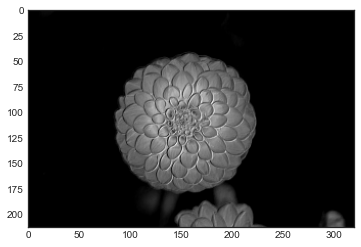

In [125]:
plt.imshow(output[0, :, :, 8], cmap = 'gray')
plt.show()

### GlobalAvgPool2D (전역 평균 풀링 층)

- `keras.layers.GlobalAvgPool2D()`

- 특징 맵 각각의 평균값을 출력하는 것이므로, 특성맵에 있는 대부분의 정보를 잃음

- 출력층에는 유용할 수 있음

In [126]:
from tensorflow.keras.layers import GlobalAvgPool2D

In [127]:
flower.shape

(1, 427, 640, 3)

In [128]:
output = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(flower)
output = GlobalAvgPool2D()(output)

output.shape

TensorShape([1, 32])

## 예제로 보는 CNN 구조와 학습
- 모델 구현은 참고만


- [런타임] - [런타임 유형변경] - GPU 변경

### 일반적인 구조

#### modules import

In [130]:
%load_ext tensorboard

In [144]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AvgPool2D, Dropout, MaxPool2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

#### 데이터 로드 및 전처리

In [137]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [138]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [139]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [140]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [141]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [142]:
# 정규화

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#### CNN을 위한 간단한 모델

In [147]:
def build():
    model = Sequential([Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]), 
                       MaxPool2D(pool_size = 2),
                       Conv2D(128, 3, activation = 'relu', padding = 'same'),
                       MaxPool2D(pool_size = 2),
                       Conv2D(256, 4, activation = 'relu', padding = 'same'),
                       MaxPool2D(pool_size = 2),
                       Flatten(),   # Fully-Connected
                       Dense(128, activation = 'relu'),
                       Dropout(0.5),
                       Dense(64, activation = 'relu'),
                       Dropout(0.5),
                       Dense(10, activation = 'softmax')])
    
    return model

#### 모델 컴파일

In [148]:
model = build()

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['acc'])

In [149]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 256)         524544    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0

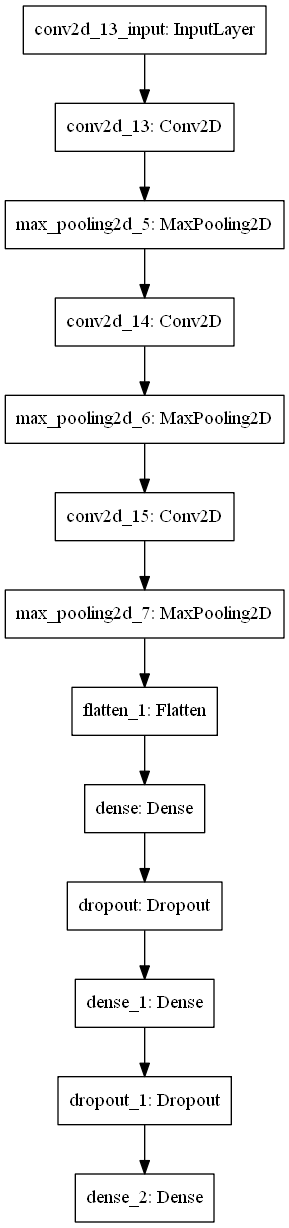

In [150]:
plot_model(model, to_file = 'CNN.png')

In [151]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir = './logs')]

#### Hyper Parameters

In [152]:
EPOCHS = 20
BATCH_SIZE = 200
VERBOSE = 1

#### 모델 학습
- `validation_split` 을 통해 검증 데이터셋을 생성


In [153]:
hist = model.fit(x_train, y_train, 
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.3,
                callbacks = callbacks,
                verbose = VERBOSE)

Epoch 1/20
210/210 [==============================] - 6s 21ms/step - loss: 1.0964 - acc: 0.6023 - val_loss: 0.5147 - val_acc: 0.8118
Epoch 2/20
210/210 [==============================] - 4s 20ms/step - loss: 0.5926 - acc: 0.7938 - val_loss: 0.3800 - val_acc: 0.8623
Epoch 3/20
210/210 [==============================] - 4s 20ms/step - loss: 0.4811 - acc: 0.8351 - val_loss: 0.3574 - val_acc: 0.8784
Epoch 4/20
210/210 [==============================] - 4s 20ms/step - loss: 0.4123 - acc: 0.8591 - val_loss: 0.3095 - val_acc: 0.8920
Epoch 5/20
210/210 [==============================] - 4s 21ms/step - loss: 0.3645 - acc: 0.8766 - val_loss: 0.2896 - val_acc: 0.8951
Epoch 6/20
210/210 [==============================] - 4s 21ms/step - loss: 0.3437 - acc: 0.8828 - val_loss: 0.2947 - val_acc: 0.8953
Epoch 7/20
210/210 [==============================] - 4s 21ms/step - loss: 0.3165 - acc: 0.8925 - val_loss: 0.2796 - val_acc: 0.9026
Epoch 8/20
210/210 [==============================] - 4s 20ms/step - 

In [154]:
log_dir = '.logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [156]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 19172), started 0:01:00 ago. (Use '!kill 19172' to kill it.)

### LeNet-5

- 필기체 인식을 위한 모델

  <img src="https://hoya012.github.io/assets/img/image_classification_guidebook/1.PNG">

  <sub>https://www.researchgate.net/figure/The-LeNet-5-Architecture-a-convolutional-neural-network_fig4_321586653</sub>

#### module import

In [157]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AvgPool2D, Dropout, MaxPool2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

#### 데이터 로드 및 전처리

In [158]:
(x_train_full, y_train_full), (x_test, y_test) = datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                 test_size = .3,
                                                 random_state = 777)
x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)
(10000, 28, 28, 1)
(10000, 10)


#### 모델 구성 및 컴파일

In [159]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()
        
        self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', input_shape = input_shape, padding = 'same'))
        self.add(AvgPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'tanh', padding = 'valid'))
        self.add(AvgPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Flatten())
        self.add(Dense(120, activation = 'tanh'))
        self.add(Dense(84, activation = 'tanh'))
        self.add(Dense(nb_classes, activation = 'softmax'))
        
        self.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics = ['acc'])

In [160]:
model = LeNet(input_shape = (28, 28, 1), nb_classes = 10)

In [161]:
model.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164

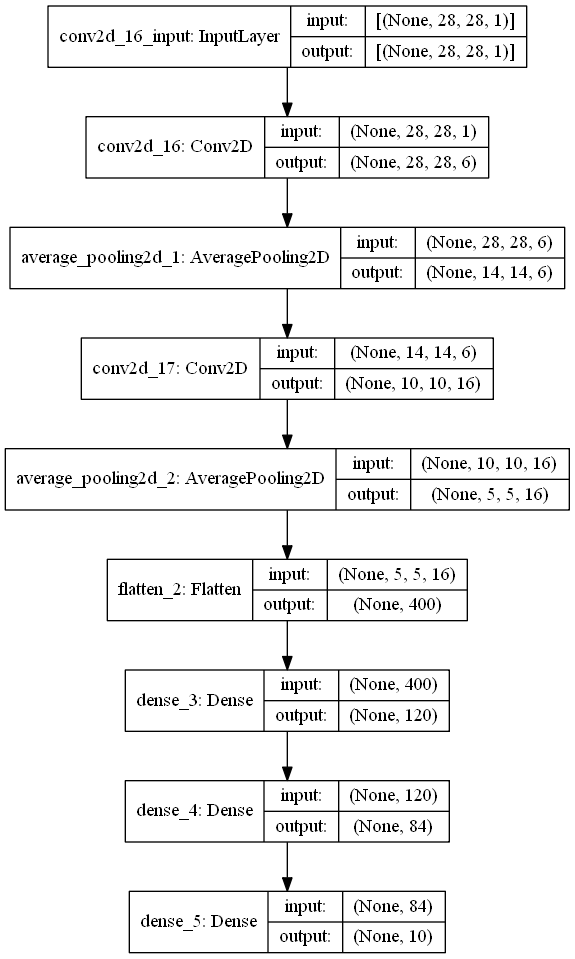

In [162]:
plot_model(model, show_shapes = True, to_file = 'LeNet.png')

#### Hyper Parameters

In [163]:
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1

#### 모델 학습

In [164]:
hist = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val),
                verbose = VERBOSE)

Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 0.4023 - acc: 0.8842 - val_loss: 0.2044 - val_acc: 0.9394
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1591 - acc: 0.9521 - val_loss: 0.1300 - val_acc: 0.9599
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1068 - acc: 0.9678 - val_loss: 0.1072 - val_acc: 0.9672
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0796 - acc: 0.9759 - val_loss: 0.0805 - val_acc: 0.9745
Epoch 5/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0621 - acc: 0.9812 - val_loss: 0.0709 - val_acc: 0.9776
Epoch 6/20
329/329 [==============================] - 2s 6ms/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0700 - val_acc: 0.9789
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.0411 - acc: 0.9879 - val_loss: 0.0616 - val_acc: 0.9804
Epoch 8/20
329/329 [==============================] - 2s 6ms/step - loss: 0.

#### 학습 결과 시각화

In [165]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

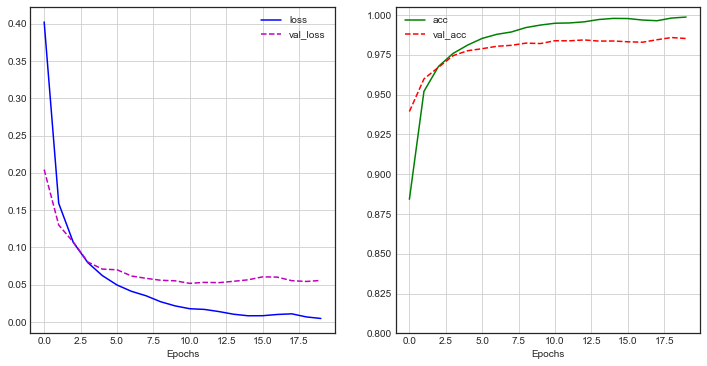

In [166]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label = 'loss')
plt.plot(hist.history['val_loss'], 'm--', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], 'g-', label = 'acc')
plt.plot(hist.history['val_acc'], 'r--', label = 'val_acc')
plt.xlabel('Epochs')
plt.ylim(0.8, 1.005)
plt.grid()
plt.legend()

plt.show()

#### 모델 평가

In [167]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0519 - acc: 0.9858


[0.05186396464705467, 0.98580002784729]